## Inferencias acerca de de los parámetros del modelo

### Análisis de los residuales

#### Ejemplo

La alta densidad de población de Japón ha provocado un sinnúmero de problemas de consumo de recursos. Una dificultad especialmente seria tiene que ver con la eliminación de desechos. El artículo “Innovative Sludge Handling Through Pelletization Thickening” (Water Research, 1999) reportó la intervención de una nueva máquina de compresión para procesar lodos de albañal. Una parte importante de la investigación implicó relacionar el contenido de humedad de gránulos comprimidos (y, en %) con la velocidad de filtración de la máquina (x, en kg-DS/m/h). 

<ol>
  <li>
        Trace los residuos en función de x. Trace los residuos en función $\hat{y}$. Trace la función de $\hat{y}$ en función de $y_i$. ¿Las gráficas resultantes sugieren que una función de regresión de línea recta es una opción razonable de modelo? Explique su razonamiento.
  </li>
  <li>
        Usando s=0.665, calcule los valores de los residuos estandarizados. ¿Es $e^{*}_i \approx e_i/s$ para $i=1, . . . , n,$ o no están las $e^{*}_i$ cerca de ser proporcionales a las $e_i$?
  </li>
  <li>
        Trace los residuos estandarizados en función de x. ¿Difiere esta gráfica significativamente en su aspecto general con respecto a la gráfica del inciso a)
  </li>
</ol>

Los siguientes datos se tomaron de una gráfica incluida en el artículo, los datos se almacenan directamente en una lista que representa los valores de $x$ y los de $y$:

In [1]:
datos_x = [125.3, 98.2, 201.4, 147.3, 145.9, 124.7, 112.2, 120.2, 161.2, 178.9, 159.5, 145.8, 75.1, 151.4, 144.2, 125.0, 198.8, 132.5, 159.6, 110.7]
datos_y = [77.9, 76.8, 81.5, 79.8, 78.2, 78.3, 77.5, 77.0, 80.1, 80.2, 79.9, 79.0, 76.7, 78.2, 79.5, 78.1, 81.5, 77.0, 79.0, 78.6]

En esta ocasión utlizaremos la librería Statsmodels que realizará nuestros cálculos para obtener el valor de los parámetros mediante MMC de la regresión ( $\hat{\beta}_0$ y $\hat{\beta}_1$). Esto trae consigo diferentes beneficios como: el generar un código mas claro, evitar errores al momento de codificar, aumenta la velocidad del análisis del modelo en cuestión, además de que algunas librerías cuentan con resultados ya calculados como los residuales, la desviación estándar de los coeficientes de la regresión, y valores-p para realizar pruebas de hipótesis.

<img src="statsmodels_img.png" alt="drawing" width="300"/>

en el sigueinte link podrán encontrar toda la información necesaria para su uso, guía del usuario y descripción de sus métodos y resultados producto de utilizar el código de esta librería: https://www.statsmodels.org/stable/index.html

Conforme avance el curso, revisaremos la utilidad de estas librerías y sus resultados, por el momento nos concentraremos en el resultado de los residuales.

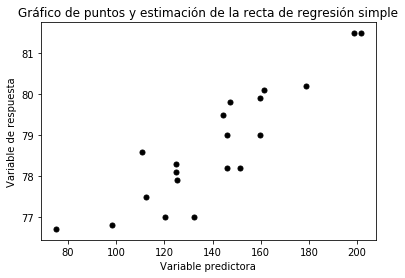

In [5]:
# Se importa librería matplotlib para realizar la gráfica de puntos
# En caso de que la gráfica no se muestre, volver a correr esta celda (hay un bug en el código que no he podido encontrar)
import matplotlib.pyplot as plt

plt.scatter(x=datos_x, y=datos_y,  marker='o', c='black', s=25)
plt.title("Gráfico de puntos y estimación de la recta de regresión simple")
plt.xlabel("Variable predictora")
plt.ylabel("Variable de respuesta")
plt.show()
plt.show()

El gráfico anterior podría sugerir que utilicemos una regresión lineal simple en función de $x$ para tratar de predecir $y$. En las siguientes celdas se comienza a trabajar con Statsmodels. Lo primero que haremos será convertir nuestras listas de datos en $arrays$, esto como lo vimos en laboratorios anteriores nos permite realizar operaciones de manera mas eficiente además de conservar propiedades como la opción de iterar sobre una estructura de este tipo.

In [7]:
# Convirtiendo nuestra lista de datos en arrays de datos
import numpy as np

array_x = np.array(datos_x)
array_y = np.array(datos_y)

Describiré lo que sucede en la siguiente celda:
<ol>
  <li>
      En la primer línea esta contenido el código para importar la librería Statsmodels.
  </li>
  <li>
    En la segunda línea se realiza una operación con nuestro array $x$. A cada valor de $x$ se agrega una constante igual a 1 para poder realizar las operaciones de Mínimos cuadrados. Este paso es necesario y es una cuestión interna de la librería relacionado al método que usa para resolver las ecuaciones normales para encontrar el valor de las betas. (Como doble check les recomiendo que impriman array_x y después array_x_constant para que vean a diferencia directa entre uno y el otro).
  </li>
  <li>
      En la tecer línea se crea el objeto $reg$ usando el método de la librería OLS (Ordinary Least Squares) y se envían con el nuestros datos $x$ y $y$. Este objeto ahora contiene internamente todos los resultados relevantes a la regresión como: valores de las betas, coeficiente de determinación, valores ajustados, residuales etc. (En este link pueden encontrar una lista de estos resultados: https://www.statsmodels.org/devel/generated/statsmodels.regression.linear_model.OLSResults.html#statsmodels.regression.linear_model.OLSResults 
  </li>
  <li>
      Utilizaremos uno de estos resultados del método OLS llamada summary(), el cual nos presenta un resumen de las principales estadísticos de la regresión.
  </li>
</ol>

In [8]:
# Importamos la librería numpy para la simplificación de operaciones
import statsmodels.api as sm

array_x_constant = sm.add_constant(array_x)

reg = sm.OLS(array_y, array_x_constant).fit()

print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     71.97
Date:                Sun, 19 Apr 2020   Prob (F-statistic):           1.05e-07
Time:                        13:08:38   Log-Likelihood:                -19.176
No. Observations:                  20   AIC:                             42.35
Df Residuals:                      18   BIC:                             44.34
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.9585      0.698    104.596      0.0

Este resultado muestra muchos resultados que nos ayudarán a realizar un diagnostico de nuestro modelo de regresión. Recordar que acabamos de crear un objeto llamado $reg$ al que hay que llamar para que se muestren resultados de la regresión, por ejemplo si queremos ver el coeficiente de determinación generamos el siguiente comando:

In [9]:
reg.rsquared

0.7999400971482361

Si queremos ver las betas generadas en el modelo:

In [10]:
reg.params

array([7.2958547e+01, 4.1033770e-02])

Esta respuesta indica que el estimador de $\beta_0$ es 72.95 y de $\beta_1$ es 0.041. Este resultado se muestra en el resumen que imprimimos hace un momento, además de que el resumen incluye la desviación estandar de cada beta y una prueba de hipótesis.

Con estos resultados generados podemos ahora resolver las cuestiones del problema del contenido de humedad en gránulos.

#### 1.- Primero trazaremos las gráficas de diagnostico para nuestro modelo.

Residuales en función de $x$.

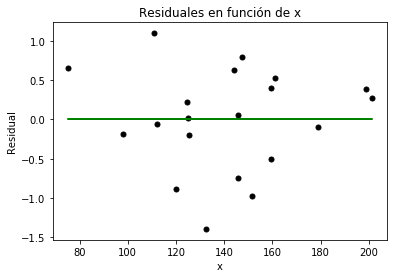

In [11]:
import matplotlib.pyplot as plt

plt.scatter(x=datos_x, y=reg.resid,  marker='o', c='black', s=25)
plt.plot(array_x, 0 * array_x, '-', c='green')
plt.title("Residuales en función de x")
plt.xlabel("x")
plt.ylabel("Residual")
plt.show()

Residuales en función de los valores ajustados.

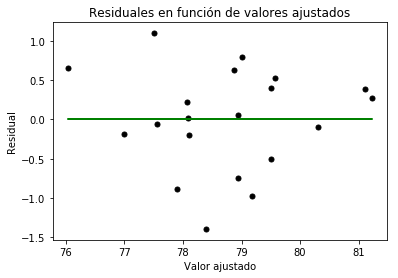

In [14]:
import matplotlib.pyplot as plt

plt.scatter(x=reg.fittedvalues, y=reg.resid,  marker='o', c='black', s=25)
plt.plot(reg.fittedvalues, 0 * reg.fittedvalues, '-', c='green')
plt.title("Residuales en función de valores ajustados")
plt.xlabel("Valor ajustado")
plt.ylabel("Residual")
plt.show()

Valores ajustados en función de los valores observados.

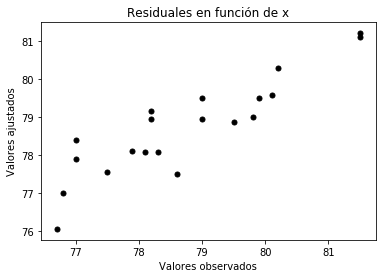

In [15]:
import matplotlib.pyplot as plt

plt.scatter(x=datos_y, y=reg.fittedvalues,  marker='o', c='black', s=25)
plt.title("Residuales en función de x")
plt.xlabel("Valores observados")
plt.ylabel("Valores ajustados")
plt.show()

Las gráficas resultantes sugieren que una función de regresión de línea recta es una opción razonable de modelo. Los residuales se distribuyen de manera azarosa alrededor de 0 y la grafica de valores ajustados vs valores observados parece formar una línea de 45°.

#### 2.- Usando s=0.665, calcule los valores de los residuos estandarizados. ¿Es $e^{*}_i \approx e_i/s$ para $i=1, . . . , n,$ o no están las $e^{*}_i$ cerca de ser proporcionales a las $e_i$?

El problema sugiere que usemos un s=0.665, sin embargo podemos obtener un valor mas exacto de la desviación estandar de modelo producido por el método OLS mediante reg.mse_resid, este valor representa la varianza del modelo. Para obtener la desviación hay que sacar raíz cuadrada a este valor.

In [18]:
# Imprime la desvación exacta del modelo
reg.mse_resid**0.5

0.6653314049228921

Utilizaremos este valor mas exacto par generar los residuales estandarizados. Recordemos que los residuos estandarizados se definen como:

$$e_{i}^*=\frac{Y_i-\hat{Y}_i}{s\sqrt{(1-\frac{1}{n}-\frac{x_i-x}{S_{xx}}}}
\hspace{10mm}
i=1,…,n$$

Guardaremos algunos valores en variables con nombres sugeridos a su verdadero valor y de esta manera sea mas fácil deducir el código.

In [20]:
# Desviación estandar del modelo
s = reg.mse_resid**0.5

# media muestral de x
x_mean = array_x.mean()

# Numero de observaciones y un array con todos los residuales calculados por la librería
n = int(reg.nobs)
residual = reg.resid

# Suma de x, suma de x cuadrada y Sxx
sum_x = sum(array_x)
sum_xx = sum(array_x*array_x)
s_xx = sum_xx-(1/n)*sum_x**2

En lqa siguiente celda se crea una lista con el valor de los residuos estandarizados.

In [21]:
# Se crea una lista vacía
residuales_std = []                  

# Se itera de 1 a n observaciones, en este caso n=20. Por lo tanto, se itera de 1 a 20.
for i in range(n):                    
    residual_sd = residual[i]/(s*((1-(1/n)-((array_x[i]-x_mean)/s_xx))**0.5))  # Aqui se describe la formula comentada arriba
    residuales_std.append(residual_sd)

# La lista la convertimos en array para mejor manejo
residuales_std = np.array(residuales_std)

# Imprime los resultados
print(residuales_std)

[-0.3083983  -0.2896602   0.4282591   1.22951335 -1.1495686   0.34610034
 -0.0963571  -1.37288297  0.8128287  -0.15357918  0.61184483  0.09057632
  1.01561768 -1.49786636  0.96292274  0.01885375  0.59301222 -2.15147011
 -0.78305753  1.69332071]


Ahora estandarizamos los residuales simplemente diviendo entre la desvación estandar. Como se puede apreciar, no existe mayor diferencia con los cálculados de manera exacta.

In [22]:
residuales_std = []
for i in range(n):
    residual_sd = residual[i]/s
    residuales_std.append(residual_sd)
residuales_std = np.array(residuales_std)
    
print(residuales_std)

[-0.30071984 -0.28266092  0.41671225  1.19816786 -1.12030488  0.33748881
 -0.09399221 -1.33889085  0.79179984 -0.14953214  0.59604388  0.08827083
  0.99171164 -1.45951288  0.93845471  0.01838448  0.57706512 -2.09748328
 -0.76283287  1.65183047]


###### Uso de librería statsmodels

La librería statsmodels cuenta con un parametro que nos arroja de manera automática los residuales estandarizados y de esta manera nos evita loa cálculos anteriores, aún así es conveniente tener una referencia de como obtenerlos po nuestra cuenta. Como se puede observar los residuales arrojados por la librería son iguales a los valores que obtuvimos usando $e^{*}_i \approx e_i/s$

In [23]:
reg.resid_pearson

array([-0.30071984, -0.28266092,  0.41671225,  1.19816786, -1.12030488,
        0.33748881, -0.09399221, -1.33889085,  0.79179984, -0.14953214,
        0.59604388,  0.08827083,  0.99171164, -1.45951288,  0.93845471,
        0.01838448,  0.57706512, -2.09748328, -0.76283287,  1.65183047])

#### Trazemos los residuos estandarizados en función de x. ¿Difiere esta gráfica significativamente en su aspecto general con respecto a la gráfica del inciso a)

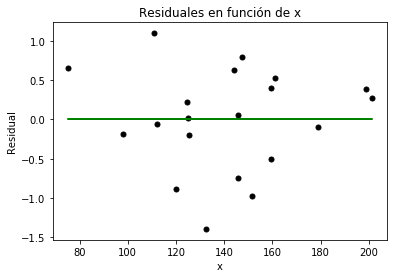

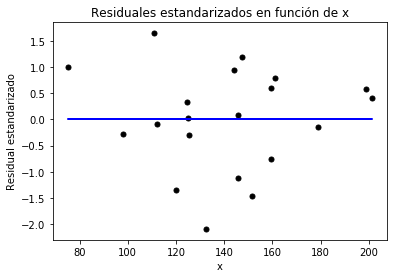

In [25]:
import matplotlib.pyplot as plt

# Residuales generados por la librería
plt.scatter(x=datos_x, y=reg.resid,  marker='o', c='black', s=25)
plt.plot(array_x, 0 * array_x, '-', c='green')
plt.title("Residuales en función de x")
plt.xlabel("x")
plt.ylabel("Residual")
plt.show()

# Residuales estandarizados generados por nostros
plt.scatter(x=datos_x, y=residuales_std,  marker='o', c='black', s=25)
plt.plot(array_x, 0 * array_x, '-', c='blue')
plt.title("Residuales estandarizados en función de x")
plt.xlabel("x")
plt.ylabel("Residual estandarizado")
plt.show()

Las gráficas no parecen diferir en gran medida.